In [50]:
import numpy as np 
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from pylab import contour
import random
np.random.seed(32);
%matplotlib inline

In [51]:
data_path = '/nfs/science-tuk-ins/tesco_insurance/adamho/AppliedMLTraining/data/'
train = pd.read_csv(data_path + 'regression.csv')

## 1. Simple Linear Regression using scikit-learn

You are doing some work for a large British retailer; Ocset.

A store manager has recently told you that Ocset Loyal customers are not necessarily the highest spenders in their store; they think their store has a unique customer base. 

You have argued that there is actually a strong, positive relationship; people that spend more in Ocset spend more in this store.

You have told your client that you will use simple linear regression to test this hypothesis.

Firstly, let's examine the training set...


##### Q 1.1: Describe the 'train' object. What type of object is it? How many rows and columns? What types exist in this object?

In [54]:
train

household  retailer_dollar_sales  retailer_units  dollar_sales  units  \
0           819                   9.86               5          9.86      5   
1           875                   6.53               5          6.53      5   
2          1132                   2.78               5          2.78      5   
3          1230                  17.93               8         15.04      7   
4          2044                  10.74               6         10.74      6   
5          2111                  10.65               7          3.49      2   
6          2209                   7.43               5          7.43      5   
7          2396                   4.71               3          4.71      3   
8          2695                   2.29               2          2.29      2   
9          2759                  15.24              12          8.60      7   
10         2981                   2.99               1          2.99      1   
11         3184                   6.78               7          6.78      7   
12         3191                  33.82              13         33.82     13   
13         3330                  20.32              14         20.32     14   
14         3421                   3.17               2          3.17      2   
15         3566                   0.79               1          0.79      1   
16         3699                  12.21               5          7.53      3   
17         3809                  29.43              21         22.66     15   
18         4143                   6.16               3          6.16      3   
19         4475                  10.53               8          2.45      2   
20         4651                   7.18               3          7.18      3   
21         4674                  74.05              41         74.05     41   
22         4700                   5.37               4          5.37      4   
23         4984                   0.80               1          0.80      1   
24         4994                   5.94               6          5.94      6   
25         5006                   9.06               6          0.88      1   
26         5328                  13.09               8         10.60      6   
27        12189                   0.79               1          0.79      1   
28        20595                  88.21              53          7.49      5   
29        31195                 121.86              88          6.99      6   
...         ...                    ...             ...           ...    ...   
1594     498919                   1.91               2          1.91      2   
1595     498921                   5.59               5          5.59      5   
1596     498922                  12.28               7         12.28      7   
1597     498923                   2.79               2          2.79      2   
1598     498924                  55.45              32         38.68     24   
1599     498925                   2.64               3          2.64      3   
1600     501550                   2.11               2          2.11      2   
1601     501552                   2.00               1          2.00      1   
1602     501553                  10.64               6          2.89      1   
1603     501812                   8.54               6          5.75      5   
1604     502296                   1.19               1          1.19      1   
1605     502684                   1.86               4          1.86      4   
1606     502715                   2.99               1          2.99      1   
1607     502716                   1.58               2          1.58      2   
1608     502744                   3.78               2          3.78      2   
1609     505143                   3.48               2          3.48      2   
1610     505257                   7.45               6          3.57      4   
1611     505716                   4.16               4          4.16      4   
1612     505957                   0.99               1  

We need to show that spend in a store is positively related to Ocset spend...
To do this, we're going to use a simple linear regression with 'retailer_dollar_sales' as our feature (i.e. X) variable and store spend (dollar_sales) as our target (i.e. y)
Let's define these variables...

In [55]:
X = train['retailer_dollar_sales']
y = train['dollar_sales']

Let's look at the distribution of those variables

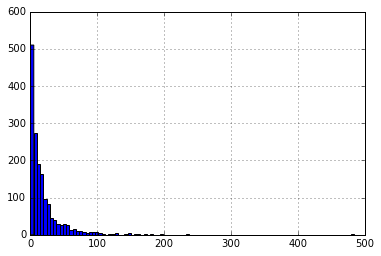

In [56]:
X.hist(bins=100);

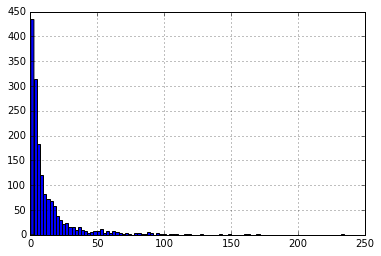

In [57]:
y.hist(bins=100);

##### Q2: Describe the distributions of these variables. Is there a name for this kind of distribution? Do you know of a good way to transform these variable so that it becomes more 'normally' distributed?

In [58]:
# This cell may be useful for Question 3
X_train = X

We can use the LinearRegression() function in scikit-learn to run a regression

In [59]:
mod = linear_model.LinearRegression()
mod.fit(X_train.reshape(-1,1), y);
preds = mod.predict(X_train.reshape(-1,1))

For regression models, it's often useful to plot predictions against the target. Look out for a regression line with a steep gradient; this is a sign that your regression model has found some signal.

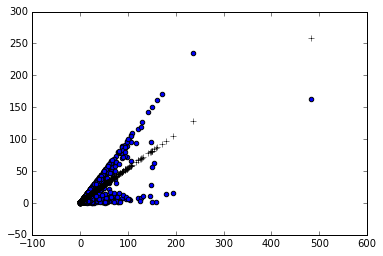

In [63]:
plt.scatter(X, y); # Creates a scatter plot of the X against the Y
plt.plot(X, preds, '+k',
         linewidth=3); # Plot a black line showing the X against the predictions

## 2. Evaluating regression model fit

After fitting a model, it's crucial to evaluate how well it has fit the data.

In particular, there are two key metrics that are useful for evaluating the fit of a regression model:

1. R-squared (higher=better fit)
2. RMSE (higher=worse fit)

Thankfully, sklearn have created a lot of handy functions for evaluating model fits, including the above metrics

In [64]:
# First, let's evaluate the R-squared of the predictions
from sklearn.metrics import r2_score
r_squared = r2_score(y, preds)
print('Our regression model explains {0:.1f}% of the variance in our data' .format(r_squared * 100))
# Documentation for this metric is here: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

Our regression model explains 56.2% of the variance in our data


In [66]:
# Now let's calculate the root-mean-squared-error (RMSE) of our regression model
# The RMSE is useful for comparing two regression models. If we don't have a competitor model, it can be useful to compare it against a vector of ones and a vector of zeros
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y, preds))
print ('The RMSE of a dumb model that predicts 1s only is {0:.2f}' .format(np.sqrt(mean_squared_error(y, np.ones(len(preds))))))
print ('The RMSE of a dumb model that predicts 0s only is {0:.2f}' .format(np.sqrt(mean_squared_error(y, np.zeros(len(preds))))))
print ('The RMSE of our regression model is {0:.2f}' .format(RMSE))

The RMSE of a dumb model that predicts 1s only is 22.95
The RMSE of a dumb model that predicts 0s only is 23.48
The RMSE of our regression model is 13.04


##### Q3: Now go back to the cell below question 2. Try taking a monotonic transformation of the X variable and then re-run the regression. Can you see how the predictions change as a result of the transformation? Is the model better or worse after these transformations?

Hint: You can use the numpy library to take monotonic transformations of arrays (e.g. **np.log()**, **np.sqrt()**, **np.exp()** etc.)


## 3. Visualising Gradient Descent

Gradient descent is often used to minimise a regression function and is used in many modern machine learning algorithms (e.g. Neural Networks).


The purpose of gradient descent is to minimise a function. In this case, our function is:
    
$$f(x) = \theta_0 + \theta_1 x$$

Recall that $\theta_0$ determines the intercept of the line whilst $\theta_1$ determines the slope. Gradient descent tries to learn the optimal values for these parameters so as to minimise our objective/cost function.

In [41]:
X = train['retailer_dollar_sales']
y = train['dollar_sales']

In [67]:
# First, let's define a gradient descent function (don't worry too much if you dont understand it)
def gradient_descent(x, y, iters, alpha):
    """Gradient descent function written by http://tillbergmann.com/blog/python-gradient-descent.html"""
    costs = []
    m = y.size # number of data points
    theta = np.random.rand(2) # random start
    history = [theta] # to store all thetas
    preds = []
    for i in range(iters):
        pred = np.dot(x, theta)
        error = pred - y 
        cost = np.sum(error ** 2) / (2 * m)
        costs.append(cost)
        
        preds.append(np.dot(x, theta))

        gradient = x.T.dot(error)/m 
        theta = theta - alpha * gradient  # update
        history.append(theta)
        
    return history, costs, preds

In [68]:
# We need to add an additional vector of ones to our X, which is used for the intercept (theta_0)
X = np.c_[np.ones(X.shape[0]), X] 

We've defined our gradient descent function and set up our X matrix. Now we need to run gradient descent.

The alpha variable determines the rate at which the algorithm learns. When an alpha is higher, gradient descent will take larger steps across the error surface.

The iters variable determines the number of iterations that gradient descent will make. 

In [69]:
alpha = 0.0001 # set step-size
iters = 500 # set number of iterations

history, cost, preds = gradient_descent(X, y, iters, alpha)
theta = history[-1]

If gradient descent is converging, then the error/cost will get lower over time. Let's plot that.

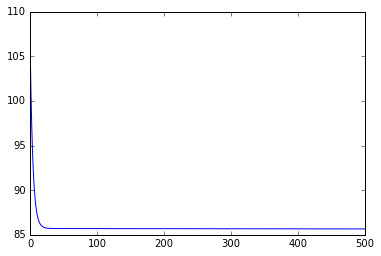

In [70]:
# Plot the learning curve, with iterations on the X axis and cost on the y axis
x1, y1 = (zip(*enumerate(cost)))
plt.plot(x1,y1);

##### Q4: Try changing the alpha value. What happens to the learning curve when you a) increase the apha b) decrease the alpha. Now try changing the number of iterations. How many iterations are required to reach a minimum in the cost? How does this change as you vary the alpha value?

As before, we can plot the predictions from our regression line. We can actually do this for every iteration made during gradient descent.

To get a sense of how gradient descent learns, try running the code below for different values of 'iteration'. Recall that the first iteration of gradient descent  (iteration = 0)  is a random guess, so it's unlikely that this line will be very good. With more iterations (as iteration gets larger), the line should look more like a fitted regression line. Eventually the line will stop moving. Can you see how this links up with the learning curve above?

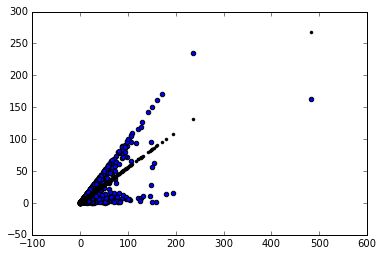

In [71]:
iteration = 499
plt.scatter(X[:,1], y);
plt.plot(X[:,1], preds[iteration], '.k',
         linewidth=3);

## 3.2 BONUS: Contour plots

Another neat way to understand gradient descent is to think about how it moves around the error surface.

The error surface can be thought of as a bowl. The bottom of the bowl is the 'global minimum'. It is gradient descent's job to find the bottom of the bowl. It does this by using the gradients of the nearby surface to move in a downward direction.

Contour plots help us to visualise the error surface in two dimensions. Concentric rings that are small, blue and close together indicate the bottom of the error bowl, whilst larger, red rings that are more widely spaced apart indicate the top (open part) of the bowl.

In [47]:
# First, let's define a neat function that calculates the cost for a given set of thetas
# Code adapted from: https://gist.github.com/marcelcaraciolo/1321575
def compute_cost(X, y, theta):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    m = y.size

    predictions = X.dot(theta).flatten()

    sqErrors = (predictions - y) ** 2

    J = (1.0 / (2 * m)) * sqErrors.sum()

    return J

In [48]:
# Define a grid of theta values that we want to calculate the cost J for
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# Initialize J_vals to a matrix of 0's
J_vals = np.zeros(shape=(theta0_vals.size, theta1_vals.size))

# Compute the cost for each set of theta values
for t1, element in enumerate(theta0_vals):
    for t2, element2 in enumerate(theta1_vals):
        thetaT = np.zeros(shape=(2, 1))
        thetaT[0][0] = element
        thetaT[1][0] = element2
        J_vals[t1, t2] = compute_cost(X, y.values, thetaT)

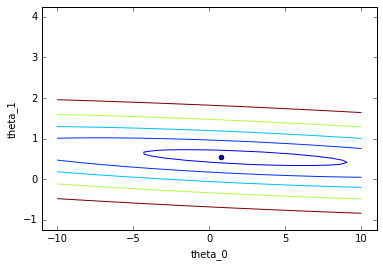

In [49]:
# Using Pylab, generate a contour plot
contour(theta0_vals, theta1_vals, J_vals.T, np.logspace(0, 3, 13))
plt.xlabel('theta_0')
plt.ylabel('theta_1')
# Let's also plot the 'optimal' thetas found by gradient descent; this should be in the bottom of the bowl (inside the blue rings)
plt.scatter(theta[0], theta[1])
plt.show()